In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.5 to /home/ajt6830/miniconda3/envs/pysr_env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.1

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed DispatchDoctor ─ v0.4.22
    Updating `~/miniconda3/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.0+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/miniconda3/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.16.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.1
  [8d63f2c5] + DispatchDoctor v0.4.22
  [ffbed15

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [9]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [10]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [11]:
df = sxs.load("dataframe")

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [12]:
df_1 = df.loc[df['reference_eccentricity'] < 0.01]
df_2 = df_1.loc[df_1["reference_dimensionless_spin1_mag"] < 0.001]
df_4 = df_2.loc[df_2["reference_dimensionless_spin2_mag"] < 0.001]
df_5 = df_4.loc[df_4["deprecated"] == False]
df_3 = df_5.loc[np.isfinite(df_5["common_horizon_time"])]
#df_3 represents the low eccentricity and low spin simulations that will be relevant for my project

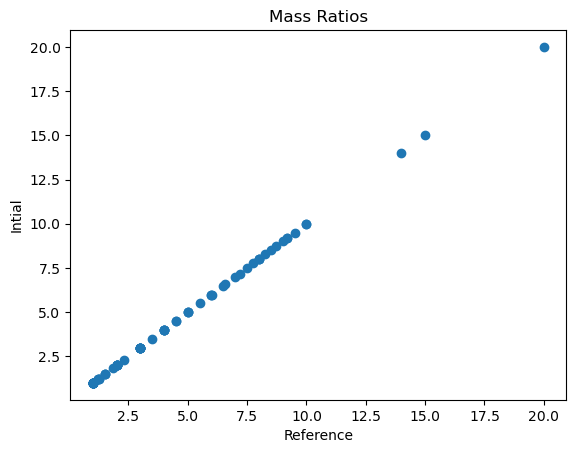

In [109]:
#Here I switch gears and see what is going on with the parameters between simulation start and the reference time
plt.scatter(df_3["reference_mass_ratio"], df_3["initial_mass_ratio"])
plt.xlabel("Reference")
plt.ylabel("Intial")
plt.title("Mass Ratios")
plt.savefig(r"C:\Users\Alex\OneDrive\Documents\Ohio_State_University\Penn_State_REU\mass_ratio_init_ref")


In [108]:
def linear_residual(q, a, b):
    return a*q + b

q_change_params = scipy.optimize.curve_fit(linear_residual, df_3["reference_mass_ratio"], df_3["initial_mass_ratio"])

q_A, q_B = q_change_params[0]

print(r"A is " + str(round(q_A, 8)) + r" ± " + str(round(np.sqrt(q_change_params[1][0][0]), 8)))

print(r"B is " + str(round(q_B, 3)) + r" ± " + str(round(np.sqrt(q_change_params[1][1][1]), 3)))

A is 1.0000541 ± 1.605e-05
B is -0.0 ± 0.0


Text(0.5, 1.0, 'Orbtial Periods')

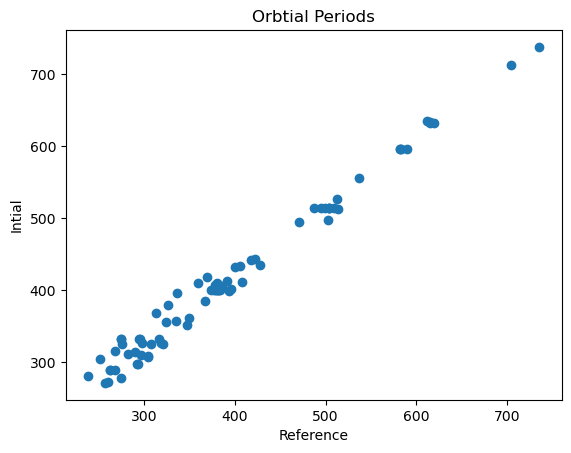

In [85]:
ref_orb_period = 2*np.pi/df_3["reference_orbital_frequency_mag"]
init_orb_period = 2*np.pi/df_3["initial_orbital_frequency"]

plt.scatter(ref_orb_period, init_orb_period)
plt.xlabel("Reference")
plt.ylabel("Intial")
plt.title("Orbtial Periods")

In [87]:
orb_change_params = scipy.optimize.curve_fit(linear_residual, ref_orb_period, init_orb_period)

A, B = orb_change_params[0]

print(r"A is " + str(round(A, 8)) + r" ± " + str(round(np.sqrt(orb_change_params[1][0][0]), 8)))

print(r"B is " + str(round(B, 3)) + r" ± " + str(round(np.sqrt(orb_change_params[1][1][1]), 3)))

A is 0.94646017 ± 0.01362848
B is 42.159 ± 5.618


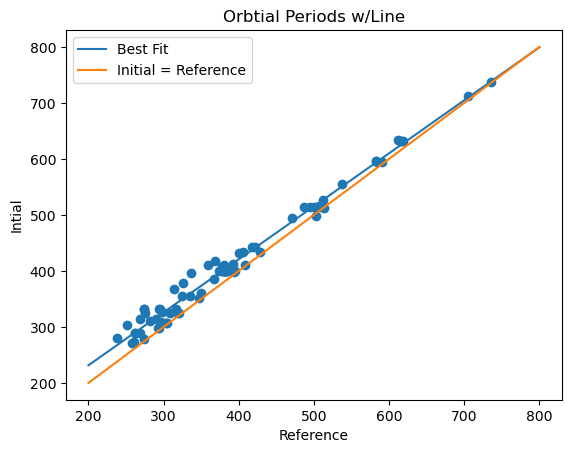

In [110]:
periods = np.linspace(200, 800, 60)

plt.plot(periods, A*periods + B, label = "Best Fit")
plt.plot(periods, periods, label = "Initial = Reference")
plt.scatter(ref_orb_period, init_orb_period)
plt.xlabel("Reference")
plt.ylabel("Intial")
plt.title("Orbtial Periods w/Line")
plt.legend()
plt.savefig(r"C:\Users\Alex\OneDrive\Documents\Ohio_State_University\Penn_State_REU\orb_period_init_ref")

#From this plot, it seem somewhat obvious that the initial orbital period is almost always greater than the reference orbital period, especially if
#the simulation initially starts with a small orbital period. I have a feeling this has something to do with the orbits decaying as the simulation
#progresses. This decay then will be greatest when the black holes are relatively close to each other (assuming that the reference time from the
#beginning of the simulation for things to settle down does not change too much with varying orbital period)

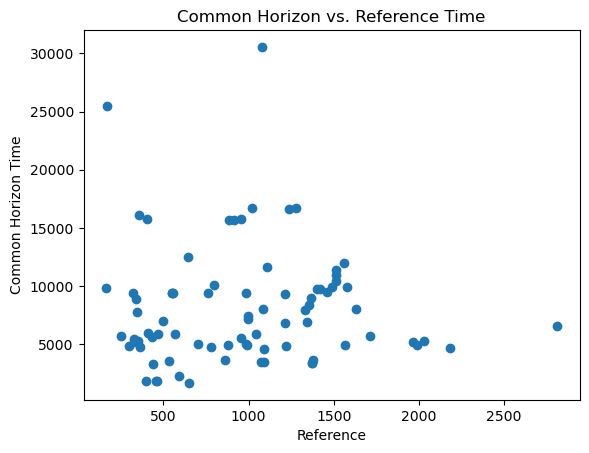

In [111]:
plt.scatter(df_3["reference_time"], df_3["common_horizon_time"])
plt.xlabel("Reference")
plt.ylabel("Common Horizon Time")
plt.title(r"Common Horizon vs. Reference Time")
plt.savefig(r"C:\Users\Alex\OneDrive\Documents\Ohio_State_University\Penn_State_REU\CH_ref_t")

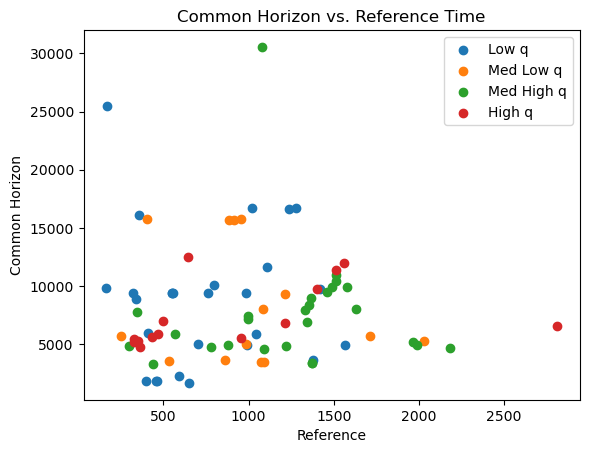

In [106]:
low_mass_ratio = np.full(len(df_3), r"SXS:BBH:0000")
med_low_mass_ratio = np.full(len(df_3), r"SXS:BBH:0000")
med_high_mass_ratio = np.full(len(df_3), r"SXS:BBH:0000")
high_mass_ratio = np.full(len(df_3), r"SXS:BBH:0000")

for i in range(len(df_3)):
    ind = df_3.index[i]
    if df_3["reference_mass_ratio"][ind] < 1.5:
        if ind[:8] != "SXS:NSNS":
            low_mass_ratio[i] = ind
    elif df_3["reference_mass_ratio"][ind] < 3:
        med_low_mass_ratio[i] = ind
    elif df_3["reference_mass_ratio"][ind] < 8:
        med_high_mass_ratio[i] = ind
    else:
        high_mass_ratio[i] = ind

low_mass_ratio = low_mass_ratio[low_mass_ratio != r"SXS:BBH:0000"]
med_low_mass_ratio = med_low_mass_ratio[med_low_mass_ratio != r"SXS:BBH:0000"]
med_high_mass_ratio = med_high_mass_ratio[med_high_mass_ratio != r"SXS:BBH:0000"]
high_mass_ratio = high_mass_ratio[high_mass_ratio != r"SXS:BBH:0000"]

plt.scatter(df_3["reference_time"][low_mass_ratio], df_3["common_horizon_time"][low_mass_ratio], label = "Low q")
plt.scatter(df_3["reference_time"][med_low_mass_ratio], df_3["common_horizon_time"][med_low_mass_ratio], label = "Med Low q")
plt.scatter(df_3["reference_time"][med_high_mass_ratio], df_3["common_horizon_time"][med_high_mass_ratio], label = "Med High q")
plt.scatter(df_3["reference_time"][high_mass_ratio], df_3["common_horizon_time"][high_mass_ratio], label = "High q")
plt.xlabel("Reference")
plt.ylabel("Common Horizon")
plt.title("Common Horizon vs. Reference Time")
plt.legend()

#I don't think that mass ratio then has much to do with determining reference time. If anything, it seems to indicate that at similar mass ratios and
#common horizon times, there are many possibilities for reference time

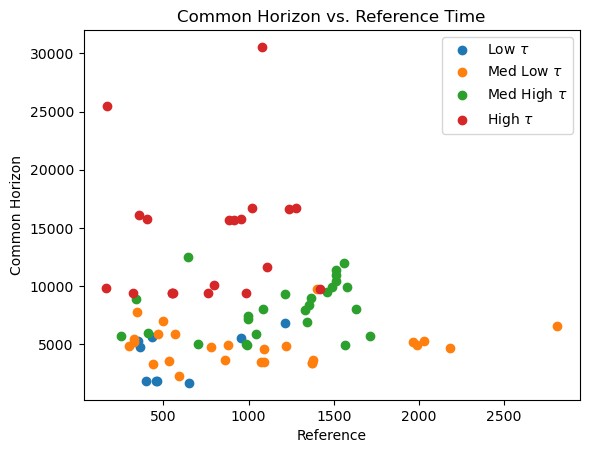

In [105]:
low_period = np.full(len(df_3), r"SXS:BBH:0000")
med_low_period = np.full(len(df_3), r"SXS:BBH:0000")
med_high_period = np.full(len(df_3), r"SXS:BBH:0000")
high_period = np.full(len(df_3), r"SXS:BBH:0000")

for i in range(len(df_3)):
    ind = df_3.index[i]
    if init_orb_period[ind] < 300:
        if ind[:8] != "SXS:NSNS":
            low_period[i] = ind
    elif init_orb_period[ind] < 400:
        med_low_period[i] = ind
    elif init_orb_period[ind] < 500:
        med_high_period[i] = ind
    else:
        high_period[i] = ind

low_period = low_period[low_period != r"SXS:BBH:0000"]
med_low_period = med_low_period[med_low_period != r"SXS:BBH:0000"]
med_high_period = med_high_period[med_high_period != r"SXS:BBH:0000"]
high_period = high_period[high_period != r"SXS:BBH:0000"]

plt.scatter(df_3["reference_time"][low_period], df_3["common_horizon_time"][low_period], label = r"Low $\tau$")
plt.scatter(df_3["reference_time"][med_low_period], df_3["common_horizon_time"][med_low_period], label = r"Med Low $\tau$")
plt.scatter(df_3["reference_time"][med_high_period], df_3["common_horizon_time"][med_high_period], label = r"Med High $\tau$")
plt.scatter(df_3["reference_time"][high_period], df_3["common_horizon_time"][high_period], label = r"High $\tau$")
plt.xlabel("Reference")
plt.ylabel("Common Horizon")
plt.title("Common Horizon vs. Reference Time")
plt.legend()

#It once again doesn't seem like there is much connection between orbital period and referenc time. Again, the same common horizon times can yeild many
#varying reference times. I suppose it is worth noting that higher values for orbital period correspond to higher values for common horizon time since
#the merging black holes start further away from each other. It is also perhaps worth noting that as a rule of thumb, larger common horizon times perhaps
#don't allow for larger reference times. Perhaps there is something about the two objects being closer that lends more variability and chaos to how 
#the physics of the simulation can settle down. Regardless, it seems like in order to ensure that enough orbits occur for your simulation, one needs to 
#have a higher initial orbital period/separation where the reference parameters don't change much from the start to reference time and common horizon
#time is longer with more completed orbits by CHT